In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [48]:
# Load dataset
file = r"C:\Users\JUNAID HABIB\OneDrive - Higher Education Commission\Desktop\Pichala\AIM\Dataset\Database.xlsx"
df = pd.read_excel(file)
df.head()

,Alloy,dH_mix,dS_mix,at_mismatch,delta_en,VEC,H/M
0,Mg35Al15Ti25V10Zn15,-0.41,12.58,9.43,6.53,4.45,1.00
1,Al0.10Ti0.30V0.2SZr0.10Nb0.25,-8.95,12.59,5.45,5.65,4.40,1.60
2,Ti0.30V0.25Zr0.10Nb0.25Ta0.10,0,12.59,5.52,5.65,4.60,2.00
3,Mg0.10Ti0.30V0.25Zr0.10Nb0.25,7.67,12.59,7.31,6.65,4.30,1.72
4,TiVZr0.74NbTa0.26,-0.04,12.72,6.88,6.54,4.57,1.91


In [49]:
# Drop the "Alloy" column
df = df.drop("Alloy", axis=1)
df.describe()
df=df.dropna()

In [50]:
# Display correlation matrix
df.corr()

,dH_mix,dS_mix,at_mismatch,delta_en,VEC,H/M
dH_mix,1.000000,0.185176,0.009137,0.221972,-0.099276,0.322250
dS_mix,0.185176,1.000000,0.499441,0.674306,0.258980,-0.371007
at_mismatch,0.009137,0.499441,1.000000,0.383634,0.070223,-0.310689
delta_en,0.221972,0.674306,0.383634,1.000000,0.087590,-0.384425
VEC,-0.099276,0.258980,0.070223,0.087590,1.000000,-0.665354
H/M,0.322250,-0.371007,-0.310689,-0.384425,-0.665354,1.000000


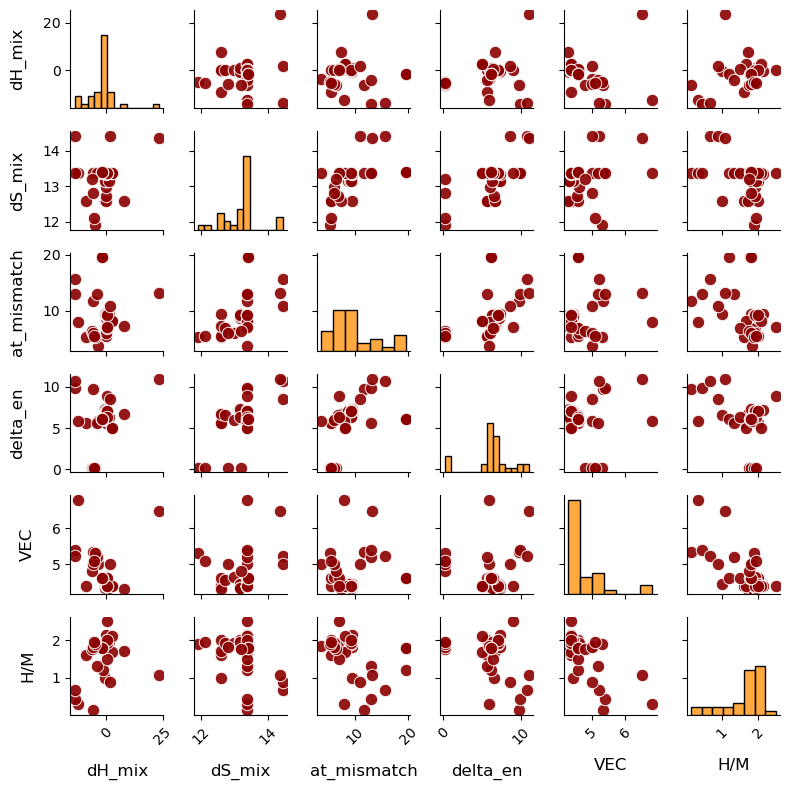

In [51]:
# Define dark color palette
scatter_color = "#8B0000"  # Dark Red
hist_color = "#FF8C00"     # Dark Orange

# Create the pairplot with enhanced dark colors
g = sns.pairplot(df, 
                 diag_kind="hist", 
                 plot_kws={'s': 80, 'alpha': 0.9, 'color': scatter_color}, 
                 diag_kws={'color': hist_color})

# Rotate x-axis labels and adjust layout
for ax in g.axes.flatten():
    if ax is not None:
        ax.set_xlabel(ax.get_xlabel(), fontsize=12, labelpad=12)
        ax.set_ylabel(ax.get_ylabel(), fontsize=12, labelpad=12)
        ax.xaxis.set_tick_params(rotation=45)

# Increase figure size
g.fig.set_size_inches(8, 8)

# Optimize layout
plt.tight_layout()
plt.show()

In [52]:
# Convert pandas DataFrame to numpy arrays
X = df.iloc[:, 0:5].to_numpy()  # Correct slicing
# iloc[row start:End row , column number]..iloc (integer-location based indexing) is used to select rows and columns by their integer position (index) instead of labels.
y = df.iloc[:, 5].to_numpy().reshape(-1, 1)  # Ensure correct shape

In [53]:
# Data Standardization (Z-score normalization)
std_scaler = preprocessing.StandardScaler()
X_std = std_scaler.fit_transform(X)

# Standardizing y as well
scaler_y = preprocessing.StandardScaler()
y_std = scaler_y.fit_transform(y)

# Convert standardized X back to DataFrame for inspection
pd.DataFrame(X_std).describe().round(2)

,0,1,2,3,4
count,35.00,35.00,35.00,35.00,35.00
mean,0.00,0.00,-0.00,0.00,0.00
std,1.01,1.01,1.01,1.01,1.01
min,-2.00,-2.50,-1.44,-2.32,-0.85
25%,-0.49,-0.31,-0.69,-0.18,-0.68
50%,0.22,0.30,-0.13,0.05,-0.32
75%,0.27,0.30,0.34,0.33,0.39
max,3.98,2.28,2.26,1.84,3.58


In [54]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, test_size=0.2, random_state=42)

# Create and train the model
regressor = linear_model.LinearRegression()
regressor.fit(X_train, y_train)

# Print the coefficients
coef_ = regressor.coef_
intercept_ = regressor.intercept_

print('Coefficients:', coef_)
print('Intercept:', intercept_)

Coefficients: [[ 0.3712744   0.2476069  -0.11588583 -0.56249997 -0.61861472]]
Intercept: [0.04860993]


In [55]:
# Predictions
y_pred = regressor.predict(X_test)

In [56]:
# Reverse scaling for comparison
y_test_original = scaler_y.inverse_transform(y_test)
y_pred_original = scaler_y.inverse_transform(y_pred)

In [57]:
# Model Evaluation
r2 = r2_score(y_test_original, y_pred_original)
mae = mean_absolute_error(y_test_original, y_pred_original)
mse = mean_squared_error(y_test_original, y_pred_original)

In [58]:
# Print Evaluation Metrics
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")


R² Score: 0.0456
Mean Absolute Error (MAE): 0.4059
Mean Squared Error (MSE): 0.2499


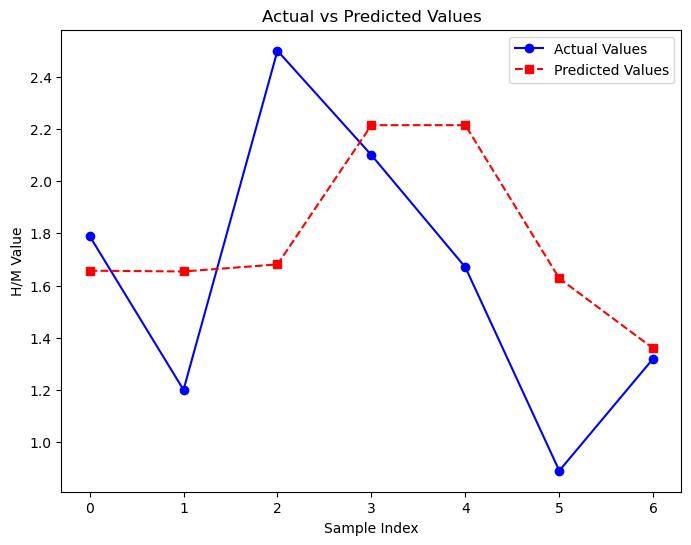

In [59]:
# Plot Predicted vs Actual values
plt.figure(figsize=(8, 6))
plt.plot(y_test_original, label="Actual Values", marker='o', linestyle='-', color="blue")
plt.plot(y_pred_original, label="Predicted Values", marker='s', linestyle='--', color="red")
plt.xlabel("Sample Index")
plt.ylabel("H/M Value")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()
